In [84]:
%matplotlib inline

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()
import numpy as np

ibmqfactory.load_account:WARNING:2021-04-06 07:00:11,917: Credentials are already in use. The existing account in the session will be replaced.


In [85]:
s = '011'
n = len(s)
circuit_bv = QuantumCircuit(n+1,n)
circuit_bv.h(np.arange(0,n+1))
circuit_bv.z(n)
circuit_bv.barrier()


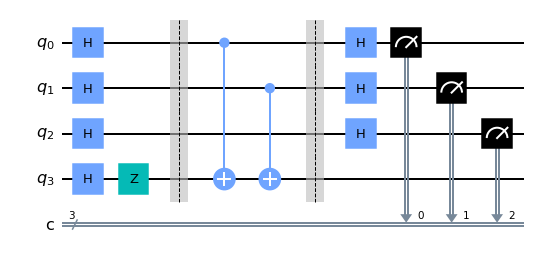

In [86]:
#creating the oracle
s = s[: :-1]
for i in range(len(s)):
    if s[i]=='1':
        circuit_bv.cx(i,n)
        
circuit_bv.barrier()
circuit_bv.h(np.arange(n))
circuit_bv.measure(np.arange(0,n),np.arange(0,n))
circuit_bv.draw()

        

In [87]:
#measurement



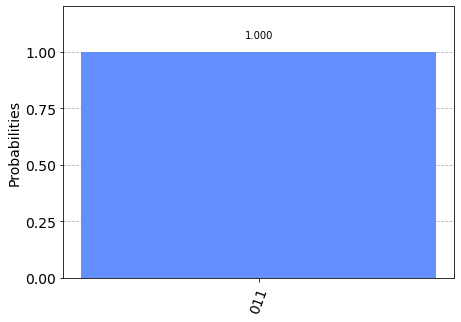

In [88]:
#simulator

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(circuit_bv,shots =1)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)


In [89]:
from qiskit.providers.ibmq import least_busy

#Loading your ibmq accounts
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits<=5 and x.configuration().n_qubits>=2 and not x.configuration().simulator and x.status().operational == True))
print("Least busy backend:",backend)

ibmqfactory.load_account:WARNING:2021-04-06 07:00:24,437: Credentials are already in use. The existing account in the session will be replaced.


Least busy backend: ibmq_belem


In [90]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit_bv = transpile(circuit_bv,backend,optimization_level=3)
job = backend.run(assemble(circuit_bv,backend))
job_monitor(job,interval = 2)


<ipython-input-90-e9e0b82dbc6e>:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(assemble(circuit_bv,backend))


Job Status: job incurred error    


In [91]:
#getting the results of computation
results = job.result()
ans = results.get_counts()
plot_histogram(ans)

Traceback (most recent call last):
  File "<ipython-input-91-8a04f2e136fb>", line 2, in <module>
    results = job.result()
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/job/ibmqjob.py", line 290, in result
    raise IBMQJobFailureError(
IBMQJobFailureError: "Unable to retrieve result for job 606c07114307333f4dac3b87. Job has failed: The Qobj uses gates (['h', 'z']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

Use %tb to get the full traceback.
